## P487

## Real OR Fake News Analysis 

## This dataset consists of about 40000 articles consisting of fake as well as real news. Our aim is train our model so that it can correctly predict whether a given piece of news is real or fake. The fake and real news data is given in two separate datasets with each dataset consisting around 20000 articles each. 


## Data set details

# step 1 :- Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import string 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
import keras
!pip install --upgrade keras



from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Load and Check Data

In [3]:
import chardet

# Detect the encoding of the file
with open('True.csv', 'rb') as f:
    result = chardet.detect(f.read())

print(result) 



{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [4]:
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [5]:
import pandas as pd
real_data = pd.read_csv('True.csv', encoding='ISO-8859-1', on_bad_lines='skip')
fake_data = pd.read_csv('Fake.csv', encoding='ISO-8859-1', on_bad_lines='skip')


In [6]:
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
print(real_data.shape)  # Returns the number of rows and columns
print(real_data.columns)  # List all column names


(21416, 4)
Index(['title', 'text', 'subject', 'date'], dtype='object')


In [9]:
print(fake_data.shape)  # Returns the number of rows and columns
print(fake_data.columns)  # List all column names


(23481, 4)
Index(['title', 'text', 'subject', 'date'], dtype='object')


In [10]:
print(real_data.dtypes)

title      object
text       object
subject    object
date       object
dtype: object


In [11]:
print(fake_data.dtypes)

title      object
text       object
subject    object
date       object
dtype: object


In [12]:
real_data['text_length'] = real_data['text'].apply(len)
print(real_data['text_length'].describe())

count    21416.000000
mean      2383.274374
std       1684.874959
min          1.000000
25%        914.000000
50%       2222.000000
75%       3237.000000
max      29781.000000
Name: text_length, dtype: float64


In [13]:
fake_data['text_length'] = fake_data['text'].apply(len)
print(fake_data['text_length'].describe())

count    23481.000000
mean      2547.396235
std       2532.884399
min          1.000000
25%       1433.000000
50%       2166.000000
75%       3032.000000
max      51794.000000
Name: text_length, dtype: float64


In [14]:
print(real_data['text'].isnull().sum())  # Check for missing text

0


In [15]:
print(fake_data['text'].isnull().sum())  # Check for missing text

0


In [16]:
# Text Preprocessing:

In [17]:
from nltk.tokenize import word_tokenize
real_data['tokens'] =real_data['text'].apply(word_tokenize)


In [18]:
# Tokenization: Split text into tokens (words or subwords) using tools like nltk . This helps in analyzing word frequency, sentence length

In [19]:
from nltk.tokenize import word_tokenize
fake_data['tokens'] = fake_data['text'].apply(word_tokenize)


In [20]:
from collections import Counter
word_counts = Counter([word for tokens in real_data['tokens'] for word in tokens])
print(word_counts.most_common(10))  # Show 10 most frequent words

[('the', 423481), (',', 406244), ('.', 326638), ('to', 244396), ('of', 204607), ('a', 188074), ('and', 179977), ('in', 170307), ('on', 105379), ('said', 99028)]


In [21]:
from collections import Counter
word_counts = Counter([word for tokens in fake_data['tokens'] for word in tokens])
print(word_counts.most_common(10))  # Show 10 most frequent words

[('the', 483871), (',', 483695), ('.', 296928), ('to', 287020), ('of', 233766), ('and', 214709), ('a', 203635), ('in', 154162), ('that', 143517), ('s', 128873)]


In [22]:
# Word Counts: Calculate the frequency of words in the dataset. This can help identify common or rare terms.

In [23]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
real_data['filtered_tokens'] = real_data['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [24]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
fake_data['filtered_tokens'] = fake_data['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [25]:
# Stopwords Removal: Remove common stopwords (e.g., "the", "a", "an") that are usually not informative in NLP tasks.



In [26]:
#add column 
real_data['target'] = 1
fake_data['target'] = 0 

In [27]:
#Merging the 2 datasets
data = pd.concat([real_data, fake_data], ignore_index=True, sort=False)
data.head()

,title,text,subject,date,text_length,tokens,filtered_tokens,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",4659,"[WASHINGTON, (, Reuters, ), -, The, head, of, ...","[WASHINGTON, (, Reuters, ), -, head, conservat...",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",4077,"[WASHINGTON, (, Reuters, ), -, Transgender, pe...","[WASHINGTON, (, Reuters, ), -, Transgender, pe...",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",2789,"[WASHINGTON, (, Reuters, ), -, The, special, c...","[WASHINGTON, (, Reuters, ), -, special, counse...",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",2461,"[WASHINGTON, (, Reuters, ), -, Trump, campaign...","[WASHINGTON, (, Reuters, ), -, Trump, campaign...",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",5204,"[SEATTLE/WASHINGTON, (, Reuters, ), -, Preside...","[SEATTLE/WASHINGTON, (, Reuters, ), -, Preside...",1


In [28]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


## Visualization

## 1. Distribution of Target Labels

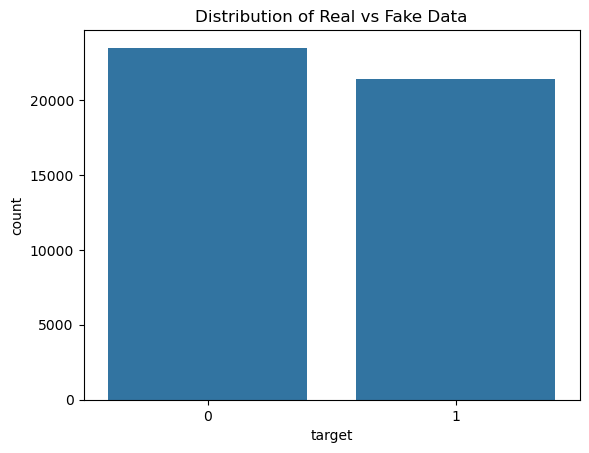

In [29]:
sns.countplot(x='target', data=data)
plt.title('Distribution of Real vs Fake Data')
plt.show()

## 2. Word Cloud

In [30]:
stop_words = set(stopwords.words('english'))
real_text = ' '.join(data[data['target'] == 1]['text'])
fake_text = ' '.join(data[data['target'] == 0]['text'])

In [31]:
## Word Cloud for fake data

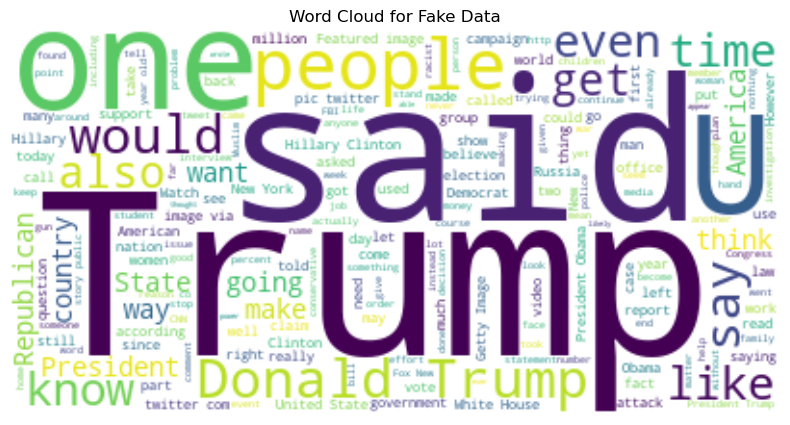

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_fake = WordCloud(stopwords=stop_words, background_color='white').generate(fake_text)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake Data')
plt.axis('off')
plt.show()

## 3. Word Frequency Distribution

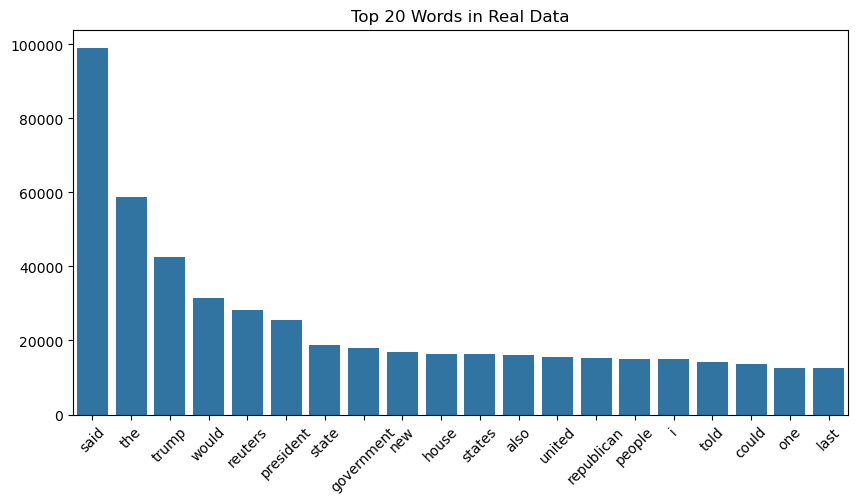

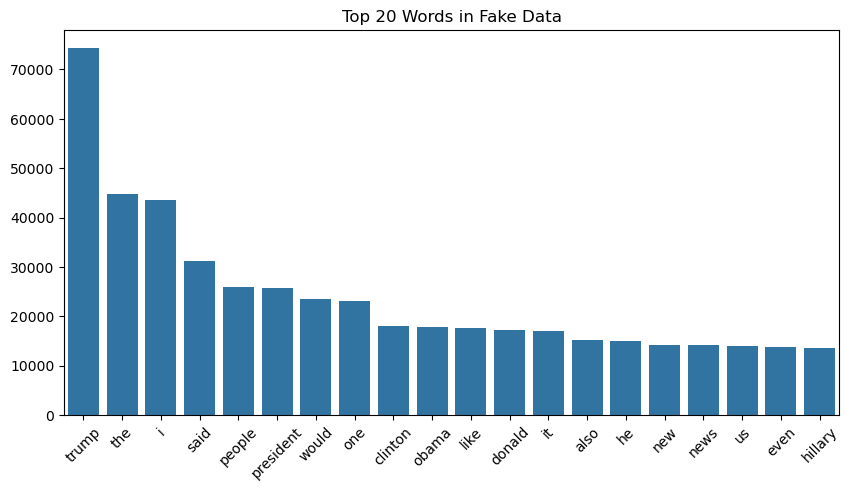

In [33]:
def plot_word_freq(text, title):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word not in stop_words]
    word_freq = Counter(words)
    common_words = word_freq.most_common(20)
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words])
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_word_freq(real_text, 'Top 20 Words in Real Data')
plot_word_freq(fake_text, 'Top 20 Words in Fake Data')

## 4. Top Bigrams

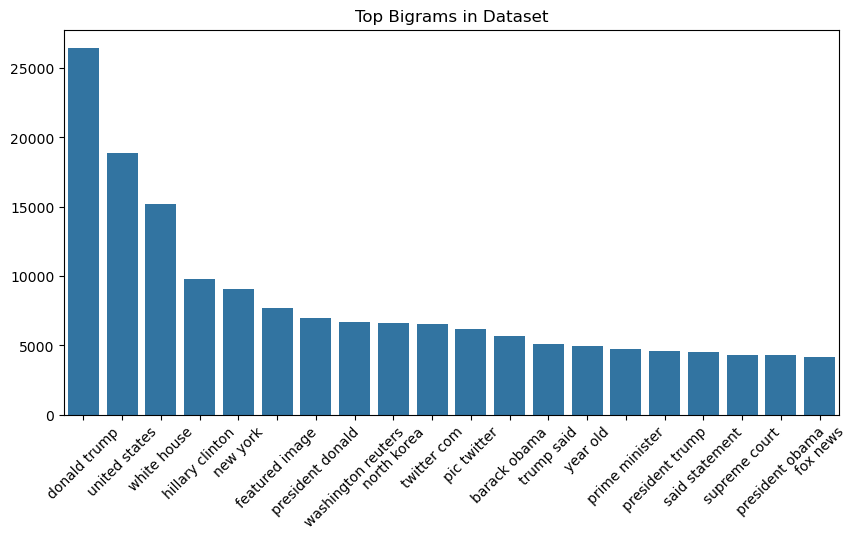

In [34]:
def plot_top_ngrams(corpus, ngram_range=(2, 2), n=None):
    from sklearn.feature_extraction.text import CountVectorizer
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)[:n]
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=[word[0] for word in words_freq], y=[word[1] for word in words_freq])
    plt.title('Top Bigrams in Dataset')
    plt.xticks(rotation=45)
    plt.show()

plot_top_ngrams(data['text'], n=20)

## 5. Text Length Distribution

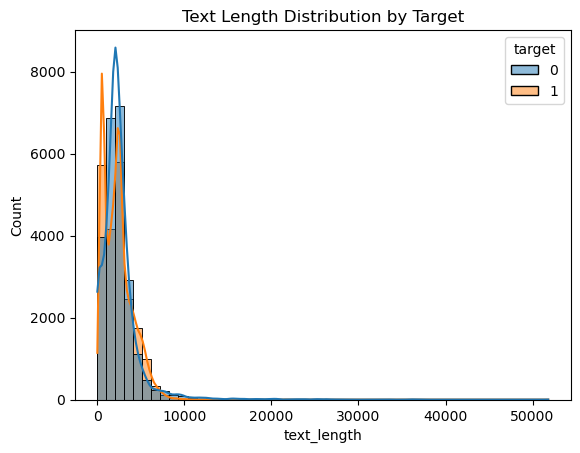

In [35]:
data['text_length'] = data['text'].apply(len)
sns.histplot(data=data, x='text_length', hue='target', bins=50, kde=True)
plt.title('Text Length Distribution by Target')
plt.show()

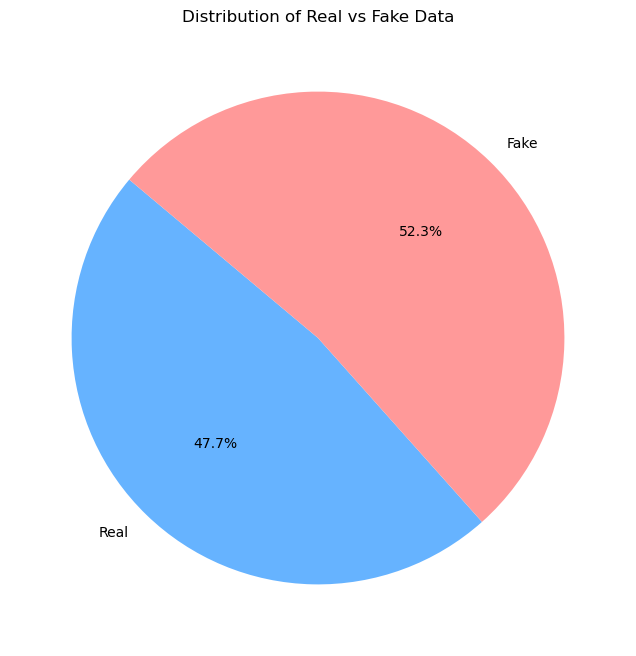

In [36]:
# Data for the pie chart
real_count = data[data['target'] == 1].shape[0]
fake_count = data[data['target'] == 0].shape[0]

# Data for the pie chart
labels = ['Real', 'Fake']
sizes = [real_count, fake_count]
colors = ['#66b3ff','#ff9999']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Real vs Fake Data')
plt.show()

## Model Building

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:

real_data['label'] = 1  # Assuming '1' represents real data
fake_data['label'] = 0  # Assuming '0' represents fake data

# Concatenate the DataFrames after adding the 'label' column
data = pd.concat([real_data, fake_data], ignore_index=True, sort=False)

X = data['text']
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##  Feature Extraction

In [39]:
# Using TF-IDF Vectorizer for text transformation
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Model Training and Evaluation

## 1. Logistic Regression

In [40]:
logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train)
y_pred_logreg = logreg.predict(X_test_tfidf)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

Logistic Regression Results:
Accuracy: 0.9847438752783965
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4644
           1       0.98      0.99      0.98      4336

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980

Confusion Matrix:
 [[4564   80]
 [  57 4279]]


## 2. Naive Bayes

In [41]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)
y_pred_nb = naive_bayes.predict(X_test_tfidf)

print("Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Naive Bayes Results:
Accuracy: 0.9339643652561247
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      4644
           1       0.93      0.93      0.93      4336

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980

Confusion Matrix:
 [[4360  284]
 [ 309 4027]]


## 3. Random Forest

In [42]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.9903118040089087
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4644
           1       0.99      0.99      0.99      4336

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Confusion Matrix:
 [[4599   45]
 [  42 4294]]


## 4. XGBoost (Gradient Boosting)


In [43]:
from xgboost import XGBClassifier


In [44]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_tfidf, y_train)
y_pred_xgb = xgb.predict(X_test_tfidf)

print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Results:
Accuracy: 0.9978841870824053
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4644
           1       1.00      1.00      1.00      4336

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Confusion Matrix:
 [[4636    8]
 [  11 4325]]


## 5. Neural Network 

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [46]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_tfidf.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [47]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_tfidf, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
y_pred_nn = (model.predict(X_test_tfidf) > 0.5).astype("int32")

print("Neural Network Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report:\n", classification_report(y_test, y_pred_nn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 62s 66ms/step - accuracy: 0.8726 - loss: 0.2987 - val_accuracy: 0.9882 - val_loss: 0.0379
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 59s 66ms/step - accuracy: 0.9952 - loss: 0.0228 - val_accuracy: 0.9900 - val_loss: 0.0355
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 60s 67ms/step - accuracy: 0.9986 - loss: 0.0076 - val_accuracy: 0.9904 - val_loss: 0.0400
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 59s 66ms/step - accuracy: 0.9992 - loss: 0.0047 - val_accuracy: 0.9891 - val_loss: 0.0494
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.9998 - loss: 0.0021 - val_accuracy: 0.9901 - val_loss: 0.0484
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 60s 67ms/step - accuracy: 0.9997 - loss: 0.0020 - val_accuracy: 0.9903 - val_loss: 0.0547
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 61s 68ms/step - accuracy: 0.9995 - loss: 0.0026 - val_accuracy: 0.9905 - val_loss: 0.0576
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 77s 86ms/step - accuracy: 0.9996 - loss: 0.0020 - 

## Model comparsion

In [48]:
models = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'XGBoost', 'Neural Network']
accuracies = [
    accuracy_score(y_test, y_pred_logreg),
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_nn)
]

for model, accuracy in zip(models, accuracies):
    print(f"{model} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.9847
Naive Bayes Accuracy: 0.9340
Random Forest Accuracy: 0.9903
XGBoost Accuracy: 0.9979
Neural Network Accuracy: 0.9890


## Visualization of Model Comparison

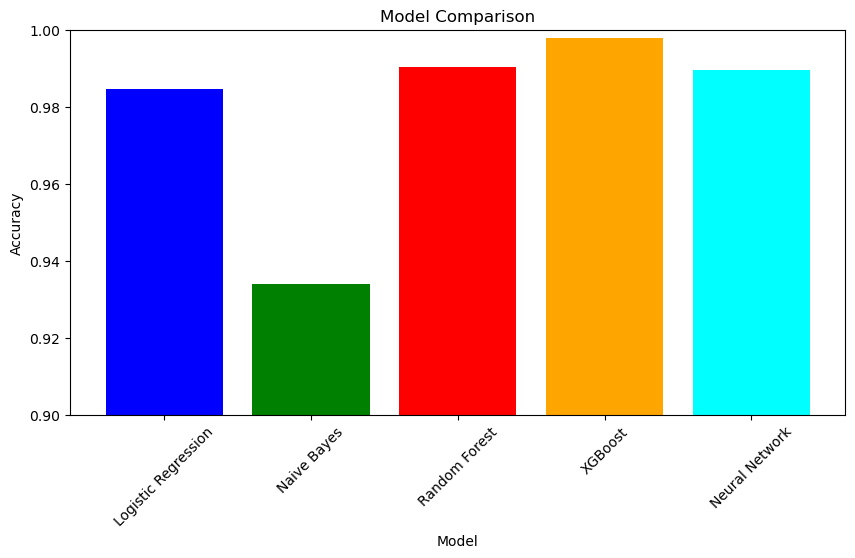

In [49]:
import matplotlib.pyplot as plt

# Model accuracies
model_results = {
    'Logistic Regression': 0.9847,
    'Naive Bayes': 0.9340,
    'Random Forest': 0.9903,
    'XGBoost': 0.9979,
    'Neural Network': 0.9895
}

# Plot the model comparison
plt.figure(figsize=(10, 5))
plt.bar(model_results.keys(), model_results.values(), color=['blue', 'green', 'red', 'orange', 'cyan'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim([0.9, 1])
plt.xticks(rotation=45)
plt.show()

## Model Deployment

In [50]:
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable


In [58]:
import streamlit as st
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:

# Load the saved model and vectorizer
try:
    with open(r"C:\Users\91766\Downloads\model.pkl", "rb") as model_file:
        model = pickle.load(model_file)
    with open(r"C:\Users\91766\Downloads\vectorizer.pkl", "rb") as vectorizer_file:
        vectorizer = pickle.load(vectorizer_file)
except Exception as e:
    st.error(f"Error loading model/vectorizer: {e}")
    st.stop()

# Streamlit UI
def main():
    st.title("📰 Fake News Detection App")
    st.subheader("Detect whether a news article is Fake or Real")
    
    # Input from user
    user_input = st.text_area("Enter news text below:", height=200)
    
    if st.button("Check News Authenticity"):
        if user_input.strip() == "":
            st.warning("Please enter news text to analyze.")
        else:
            prediction = predict_fake_news(user_input)
            if prediction == 1:
                st.error("⚠️ Fake News Detected!")
            else:
                st.success("✅ The news appears to be Real.")

# Prediction Function
def predict_fake_news(text):
    try:
        transformed_text = vectorizer.transform([text])  
        prediction = model.predict(transformed_text)[0]  
        return prediction
    except Exception as e:
        st.error(f"Error processing input: {e}")
        return None

if __name__ == "__main__":
    main()  